In [17]:
## PLS
from warnings import filterwarnings
filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error,r2_score

In [18]:
##veriyi test train diye ayırdık
hit = pd.read_csv("Hitters.csv")
df = hit. copy ()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_= df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [19]:
##model oluşturduk
from sklearn.cross_decomposition import PLSRegression, PLSSVD
pls_model = PLSRegression().fit(X_train, y_train) ## suan component girmek 
#ama pls_model = PLSRegression(n_components=2).fit(X_train, y_train) diye girebiliriz
pls_model.coef_

array([[ 35.32916493,  48.83425857,  18.50240933,  39.28117603,
         30.59952998,  40.03398345,  16.85990516,  28.22289896,
         32.73784993,  22.00875744,  33.60903032,  30.39402522,
         25.73279799,  54.98835148,   6.56590871,  -0.90894359,
         17.60903423, -37.24246339,  14.69680385]])

In [20]:
######Tahmin
pls_model.predict(X_train)[0:10]
##train için
y_pred = pls_model.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))
##r2_score(y_train, y_pred)
##test için
y_pred = pls_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))


398.09956327448526

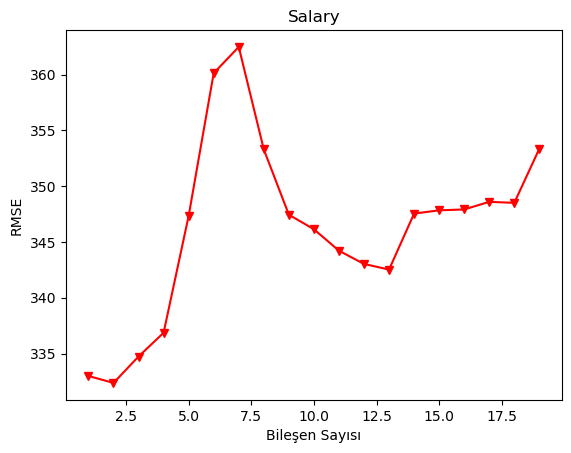

In [26]:
#CV
cv_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)


#Hata hesaplamak için döngü
RMSE = []

for i in np.arange(1, X_train.shape[1] + 1):
    pls = PLSRegression(n_components=i)
    score = np.sqrt(-1*cross_val_score(pls, X_train, y_train, cv=cv_10, scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

#Sonuçların Görselleştirilmesi
import matplotlib.pyplot as plt
plt.plot(np.arange(1, X_train.shape[1] + 1), np.array(RMSE), '-v', c = "r")
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Salary');

In [30]:
## baktık ki en küçük hata 2 bileşende gelmiş ozaman 2 bileşenli bir model kurduk
pls_model = PLSRegression(n_components = 2).fit(X_train, y_train)

In [28]:
y_pred = pls_model.predict(X_test)

In [29]:
np.sqrt(mean_squared_error(y_test, y_pred))

398.09956327448526